Original Stochastic Differential Equation:

\begin{equation}
dS_t = \mu S_t dt + \sigma S_t dW_t
\end{equation}

Integrated form:

\begin{align*}
- \log S_t &= \log S_0 + \int_{t_0}^{t} \left( \mu - \frac{\sigma^2}{2} \right) ds + \int_{t_0}^{t} \sigma dW_s \\
- \log S_t &= \log S_0 + \left( \mu - \frac{\sigma^2}{2} \right) t + \sigma W_t \\
- \log S_t &\sim \mathcal{N} \left( \log S_0 + \left( \mu - \frac{\sigma^2}{2} \right) t, \sigma^2 t \right)
\end{align*}


Explicit expression:

\begin{equation}
S_t = S_0 e^{\left( \mu - \frac{\sigma^2}{2} \right) t + \sigma W_t}
\end{equation}


In [3]:
import numpy as np
import matplotlib.pyplot as plt
def simulate_geometric_brownian_motion_paths(S0, sigma, mu, T, n=1000, M = 100, plot=False):
    dt = T / n
    # simulation using numpy arrays
    St = np.exp(
        (mu - sigma ** 2 / 2) * dt
        + sigma * np.random.normal(0, np.sqrt(dt), size=(M,n)).T
    )

    # include array of 1's
    St = np.vstack([np.ones(M), St])

    # multiply through by S0 and return the cumulative product of elements along a given simulation path (axis=0). 
    St = S0 * St.cumprod(axis=0)

    if plot:
        # Define time interval correctly 
        time = np.linspace(0,T,n+1)

        # Require numpy array that is the same shape as St
        tt = np.full(shape=(M,n+1), fill_value=time).T

        plt.plot(tt, St)
        plt.xlabel("Years $(t)$")
        plt.ylabel("Stock Price $(S_t)$")
        plt.title(
            f"Realizations of Geometric Brownian Motion\n $dS_t = \mu S_t dt + \sigma S_t dW_t$\n $S_0 = {S0}, \mu = {mu}, \sigma = {sigma}$"
        )
        plt.show()
    return St

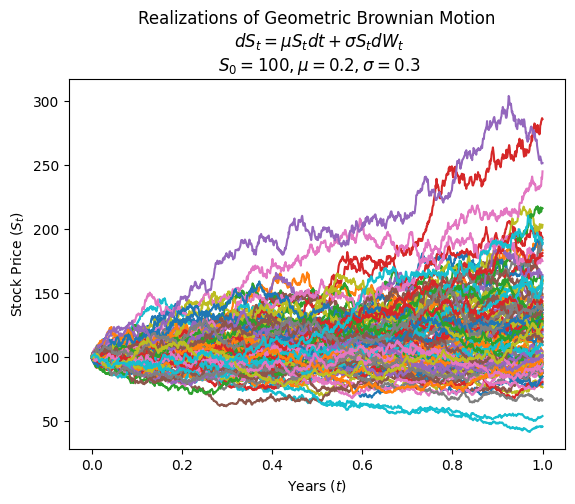

array([[100.        , 100.        , 100.        , ..., 100.        ,
        100.        , 100.        ],
       [ 99.22262419, 100.97836967,  99.43586605, ...,  99.45005243,
        100.07346019, 100.68782029],
       [100.99697637, 101.33451383,  99.8868268 , ...,  99.04999373,
        101.6489574 , 101.2418541 ],
       ...,
       [ 99.89525562, 184.56109978, 161.43877882, ..., 137.88596733,
        124.88546111, 190.21798132],
       [ 99.91228655, 183.48267859, 158.94009786, ..., 136.94209022,
        126.58767894, 191.56808448],
       [101.0649078 , 183.62429108, 160.57759406, ..., 137.04134541,
        125.33800741, 188.44663442]])

In [4]:
###### Example ######
# Parameters
# drift coefficent
mu = 0.2
# number of steps
n = 100
# time in years
T = 1
# number of sims
M = 100
# initial stock price
S0 = 100
# volatility
sigma = 0.3

simulate_geometric_brownian_motion_paths(S0, sigma, mu, T, plot=True)

Reference:
admin (n.d.). Simulating Geometric Brownian Motion (GBM) in Python – QuantPy. [online] Available at: https://quantpy.com.au/stochastic-calculus/simulating-geometric-brownian-motion-gbm-in-python/.